# Clustering with KMeans

- Easy to use
- We determing the # of clusters
- Assumption clusters are circular
- SCALE Data
- .cluster_centers_, .inertia_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from wrangle import *
from env import *

In [2]:
url = get_db_url('mall_customers')

query = '''
            SELECT *
            FROM customers
        '''

df = pd.read_sql(query,url)

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
train,val,test = split_data(df)

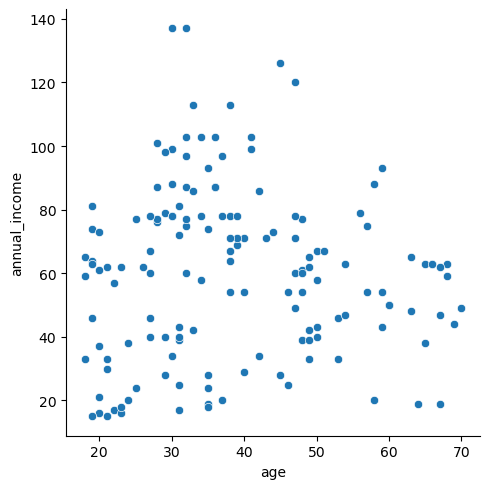

In [5]:
sns.relplot(data=train,x='age',y='annual_income')

In [6]:
X = train[['age','annual_income']]

In [7]:
seed = 42
kmeans = KMeans(n_clusters=3,random_state=seed)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [8]:
X['unscaled_custers']=kmeans.predict(X)
X.head()

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_31641/1095923196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unscaled_custers']=kmeans.predict(X)


,age,annual_income,unscaled_custers
114,18,65,1
173,36,87,1
5,22,17,2
126,43,71,1
117,49,65,0


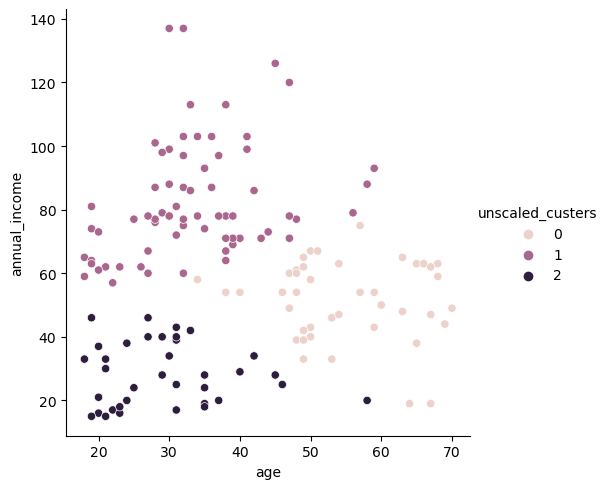

In [9]:
sns.relplot(data=X,x='age',y='annual_income',hue='unscaled_custers')

In [10]:
mm_scaler = MinMaxScaler()

X[['age','annual_income']] = mm_scaler.fit_transform(X[['age','annual_income']])

X.head()

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_31641/4202212440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age','annual_income']] = mm_scaler.fit_transform(X[['age','annual_income']])


,age,annual_income,unscaled_custers
114,0.000000,0.409836,1
173,0.346154,0.590164,1
5,0.076923,0.016393,2
126,0.480769,0.459016,1
117,0.596154,0.409836,0


In [12]:
kmeans_scaled = KMeans(n_clusters=3,random_state=42)

kmeans_scaled.fit(X[['age','annual_income']])

KMeans(n_clusters=3, random_state=42)

In [13]:
X['scaled_clusters']=kmeans_scaled.predict(X[['age','annual_income']])

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_31641/3120388981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scaled_clusters']=kmeans_scaled.predict(X[['age','annual_income']])


In [14]:
X.head()

,age,annual_income,unscaled_custers,scaled_clusters
114,0.000000,0.409836,1,0
173,0.346154,0.590164,1,2
5,0.076923,0.016393,2,0
126,0.480769,0.459016,1,2
117,0.596154,0.409836,0,1


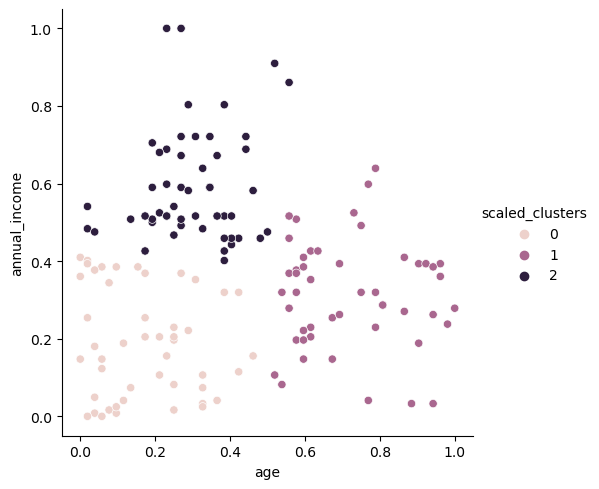

In [16]:
sns.relplot(data=X,x='age',y='annual_income',hue='scaled_clusters')

In [17]:
kmeans_scaled.cluster_centers_

array([[0.17184943, 0.18852459],
       [0.72538462, 0.31459016],
       [0.30079826, 0.5920198 ]])

In [18]:
kmeans_scaled.inertia_

5.552472336792252

In [19]:
inertia = []
seed = 42
for n in range(1,11):
    kmeans = KMeans(n_clusters=n, random_state = seed)
    kmeans.fit(X[['age','annual_income']])
    inertia.append(kmeans.inertia_)
inertia

[18.12616472118108,
 10.004282316433692,
 5.552472336792252,
 4.473823857554272,
 3.427851684392673,
 2.7945616054258244,
 2.2729556083833216,
 1.9462591925652846,
 1.6890736390306382,
 1.5813881455142607]

In [23]:
results_df = pd.DataFrame({'n_clusters':list(range(1,11))
                           ,'inertia':inertia})

In [24]:
results_df

,n_clusters,inertia
0,1,18.126165
1,2,10.004282
2,3,5.552472
3,4,4.473824
4,5,3.427852
5,6,2.794562
6,7,2.272956
7,8,1.946259
8,9,1.689074
9,10,1.581388


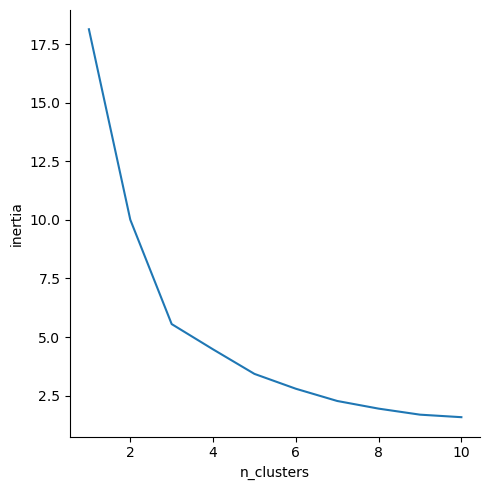

In [26]:
sns.relplot(kind='line', data=results_df, x='n_clusters',y='inertia')